##  Loading the neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
df = pd.read_csv('Electricity_Bill.csv')

In [3]:
df.head(5)

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,11/1/16,0:00,0:14,0.07,kWh,$0.01,NaN
1,Electric usage,11/1/16,0:15,0:29,0.05,kWh,$0.01,NaN
2,Electric usage,11/1/16,0:30,0:44,0.06,kWh,$0.01,NaN
3,Electric usage,11/1/16,0:45,0:59,0.05,kWh,$0.01,NaN
4,Electric usage,11/1/16,1:00,1:14,0.03,kWh,$0.01,NaN


In [4]:
df.shape

(31864, 8)

In [5]:
df.USAGE.isnull().sum()

0

In [6]:
df.DATE.isnull().sum()

0

In [7]:
df.USAGE.describe()

count    31864.000000
mean         0.126867
std          0.255874
min          0.010000
25%          0.020000
50%          0.040000
75%          0.090000
max          2.820000
Name: USAGE, dtype: float64

# Preprocessing and Feature Engineering

## Adding a variable TIME byconcatenting DATE, START TIME and END TIME

In [8]:
df["TIME"] = pd.to_datetime(df.DATE + " " + df["END TIME"])

In [9]:
df.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,TIME
0,Electric usage,11/1/16,0:00,0:14,0.07,kWh,$0.01,NaN,2016-11-01 00:14:00
1,Electric usage,11/1/16,0:15,0:29,0.05,kWh,$0.01,NaN,2016-11-01 00:29:00
2,Electric usage,11/1/16,0:30,0:44,0.06,kWh,$0.01,NaN,2016-11-01 00:44:00
3,Electric usage,11/1/16,0:45,0:59,0.05,kWh,$0.01,NaN,2016-11-01 00:59:00
4,Electric usage,11/1/16,1:00,1:14,0.03,kWh,$0.01,NaN,2016-11-01 01:14:00


In [10]:
df.TIME.max()

Timestamp('2017-09-30 23:59:00')

## Extracting the weekend feature

In [11]:
df["IS_WEEKEND"] = df.TIME.apply(lambda x: 1 if x.dayofweek > 5 else 0)

In [12]:
df.head(5)

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,TIME,IS_WEEKEND
0,Electric usage,11/1/16,0:00,0:14,0.07,kWh,$0.01,NaN,2016-11-01 00:14:00,0
1,Electric usage,11/1/16,0:15,0:29,0.05,kWh,$0.01,NaN,2016-11-01 00:29:00,0
2,Electric usage,11/1/16,0:30,0:44,0.06,kWh,$0.01,NaN,2016-11-01 00:44:00,0
3,Electric usage,11/1/16,0:45,0:59,0.05,kWh,$0.01,NaN,2016-11-01 00:59:00,0
4,Electric usage,11/1/16,1:00,1:14,0.03,kWh,$0.01,NaN,2016-11-01 01:14:00,0


## Consumption in weekends > Consumption in weekdays

In [13]:
df[df.IS_WEEKEND == 1].USAGE.mean()

0.1504011786038008

In [14]:
df[df.IS_WEEKEND == 0].USAGE.mean()

0.12308429258345209

## Adding last 5 usage to each input value

In [15]:
for i in range(1,6):
    df["T_" + str(i)] = df.USAGE.shift(i)

In [16]:
df.fillna(0,inplace=True)

In [17]:
df.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,TIME,IS_WEEKEND,T_1,T_2,T_3,T_4,T_5
0,Electric usage,11/1/16,0:00,0:14,0.07,kWh,$0.01,0,2016-11-01 00:14:00,0,0.00,0.00,0.00,0.00,0.0
1,Electric usage,11/1/16,0:15,0:29,0.05,kWh,$0.01,0,2016-11-01 00:29:00,0,0.07,0.00,0.00,0.00,0.0
2,Electric usage,11/1/16,0:30,0:44,0.06,kWh,$0.01,0,2016-11-01 00:44:00,0,0.05,0.07,0.00,0.00,0.0
3,Electric usage,11/1/16,0:45,0:59,0.05,kWh,$0.01,0,2016-11-01 00:59:00,0,0.06,0.05,0.07,0.00,0.0
4,Electric usage,11/1/16,1:00,1:14,0.03,kWh,$0.01,0,2016-11-01 01:14:00,0,0.05,0.06,0.05,0.07,0.0


## Sticking to only relevant features

In [18]:
df = df[['TIME','IS_WEEKEND', 'T_1','T_2', 'T_3', 'T_4', 'T_5','USAGE']]

## November 2016 - August 2017 = Training Set

In [19]:
training_data = df[df.TIME < pd.to_datetime("08/01/2017")]
training_data.tail(5)

,TIME,IS_WEEKEND,T_1,T_2,T_3,T_4,T_5,USAGE
26004,2017-07-31 22:59:00,0,0.27,0.44,0.12,0.12,0.31,0.10
26005,2017-07-31 23:14:00,0,0.10,0.27,0.44,0.12,0.12,0.15
26006,2017-07-31 23:29:00,0,0.15,0.10,0.27,0.44,0.12,0.12
26007,2017-07-31 23:44:00,0,0.12,0.15,0.10,0.27,0.44,0.11
26008,2017-07-31 23:59:00,0,0.11,0.12,0.15,0.10,0.27,0.10


## August 2017 = Validation Set

In [20]:
validation_data = df.loc[((df.TIME >= pd.to_datetime('08/01/2017')) & (df.TIME < pd.to_datetime('09/01/2017')))]

In [21]:
validation_data.head(5)

,TIME,IS_WEEKEND,T_1,T_2,T_3,T_4,T_5,USAGE
26009,2017-08-01 00:14:00,0,0.10,0.11,0.12,0.15,0.10,0.10
26010,2017-08-01 00:29:00,0,0.10,0.10,0.11,0.12,0.15,0.10
26011,2017-08-01 00:44:00,0,0.10,0.10,0.10,0.11,0.12,0.08
26012,2017-08-01 00:59:00,0,0.08,0.10,0.10,0.10,0.11,0.05
26013,2017-08-01 01:14:00,0,0.05,0.08,0.10,0.10,0.10,0.04


## September 2017 = Test Set

In [22]:
test_data = df.loc[df.TIME >= pd.to_datetime('09/01/2017')]

In [23]:
test_data.head(5)

,TIME,IS_WEEKEND,T_1,T_2,T_3,T_4,T_5,USAGE
28984,2017-09-01 00:14:00,0,0.03,0.03,0.04,0.04,0.05,0.03
28985,2017-09-01 00:29:00,0,0.03,0.03,0.03,0.04,0.04,0.04
28986,2017-09-01 00:44:00,0,0.04,0.03,0.03,0.03,0.04,0.06
28987,2017-09-01 00:59:00,0,0.06,0.04,0.03,0.03,0.03,0.03
28988,2017-09-01 01:14:00,0,0.03,0.06,0.04,0.03,0.03,0.03


In [24]:
training_data = training_data[['IS_WEEKEND', 'T_1','T_2', 'T_3', 'T_4', 'T_5','USAGE']]
validation_data = validation_data[['IS_WEEKEND', 'T_1','T_2', 'T_3', 'T_4', 'T_5','USAGE']]
test_data = test_data[['IS_WEEKEND', 'T_1','T_2', 'T_3', 'T_4', 'T_5','USAGE']]

In [25]:
X_train,y_train = training_data.drop(["USAGE"],axis=1),training_data.USAGE
X_val,y_val = validation_data.drop(["USAGE"],axis=1),validation_data.USAGE
X_test,y_test = test_data.drop(["USAGE"],axis=1),test_data.USAGE

## Converting our data to 3 Dimensions

In [26]:
X_train = np.array(X_train)
X_train = X_train.reshape((X_train.shape[0],1,X_train.shape[1]))

X_val = np.array(X_val)
X_val = X_val.reshape((X_val.shape[0],1,X_val.shape[1]))

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

## Importing the Deep Learning Libraries

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

C:\Users\zsree\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Building our Model

In [28]:
model_k = Sequential()
model_k.add(LSTM(1, input_shape=(1,6)))
model_k.add(Dense(1))
model_k.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])

In [29]:
history = model_k.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=50, batch_size=96, verbose=2)

Train on 26009 samples, validate on 2975 samples
Epoch 1/50
 - 1s - loss: 0.0758 - mean_absolute_error: 0.1287 - val_loss: 0.0156 - val_mean_absolute_error: 0.1005
Epoch 2/50
 - 0s - loss: 0.0690 - mean_absolute_error: 0.1310 - val_loss: 0.0143 - val_mean_absolute_error: 0.0916
Epoch 3/50
 - 0s - loss: 0.0627 - mean_absolute_error: 0.1193 - val_loss: 0.0128 - val_mean_absolute_error: 0.0788
Epoch 4/50
 - 0s - loss: 0.0559 - mean_absolute_error: 0.1082 - val_loss: 0.0117 - val_mean_absolute_error: 0.0709
Epoch 5/50
 - 0s - loss: 0.0496 - mean_absolute_error: 0.0989 - val_loss: 0.0108 - val_mean_absolute_error: 0.0643
Epoch 6/50
 - 0s - loss: 0.0444 - mean_absolute_error: 0.0916 - val_loss: 0.0099 - val_mean_absolute_error: 0.0607
Epoch 7/50
 - 0s - loss: 0.0401 - mean_absolute_error: 0.0863 - val_loss: 0.0091 - val_mean_absolute_error: 0.0566
Epoch 8/50
 - 0s - loss: 0.0367 - mean_absolute_error: 0.0823 - val_loss: 0.0085 - val_mean_absolute_error: 0.0551
Epoch 9/50
 - 0s - loss: 0.0340

## Predictions

In [30]:
Pred = model_k.predict(X_test)
y_test = np.array(y_test)

In [31]:
plt.rcParams['figure.figsize'] = (15.0, 6.0)

## Actual Data

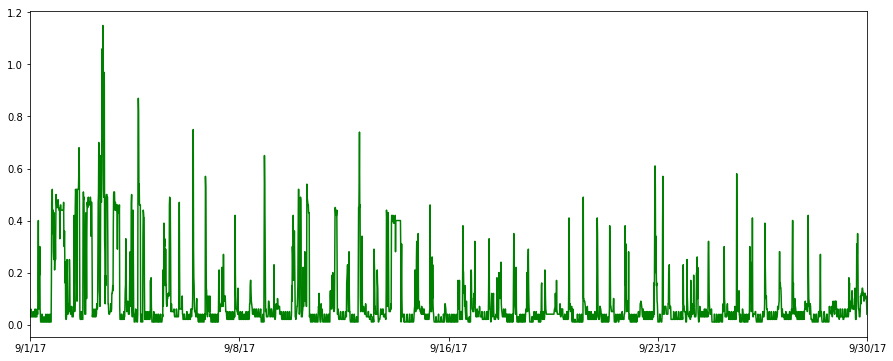

In [32]:
plt.plot(range(len(y_test)),y_test,color='g')
plt.xlim(0,2880)
plt.xticks([0,720,1440,2160,2880],['9/1/17','9/8/17','9/16/17','9/23/17','9/30/17'])
plt.show()

## Predicted Data

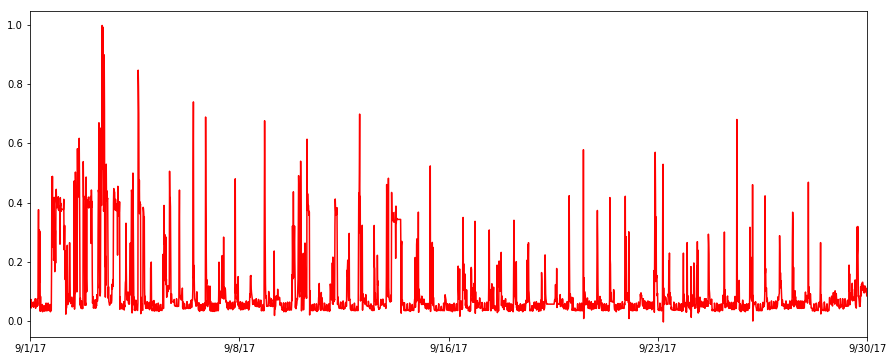

In [33]:
plt.plot(range(len(Pred)),Pred,color='r')
plt.xlim(0,2880)
plt.xticks([0,720,1440,2160,2880],['9/1/17','9/8/17','9/16/17','9/23/17','9/30/17'])
plt.show()

## Actual and Predicted almost coincides

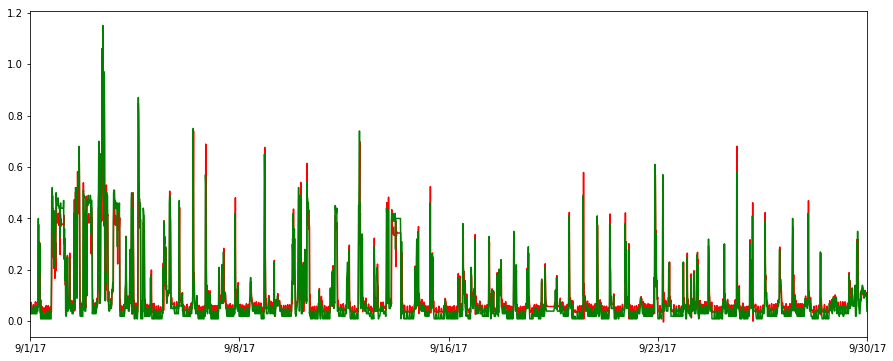

In [34]:
plt.plot(range(len(Pred)),Pred,color='r')
plt.plot(range(len(y_test)),y_test,color='g')
#plt.plot(ko.DATE[28984:31864],Pred,color='r')
plt.xlim(0,2880)
plt.xticks([0,720,1440,2160,2880],['9/1/17','9/8/17','9/16/17','9/23/17','9/30/17'])
plt.show()

In [35]:
test_data['Pred'] = Pred

In [36]:
test_data.head(5)

,IS_WEEKEND,T_1,T_2,T_3,T_4,T_5,USAGE,Pred
28984,0,0.03,0.03,0.04,0.04,0.05,0.03,0.051914
28985,0,0.03,0.03,0.03,0.04,0.04,0.04,0.050643
28986,0,0.04,0.03,0.03,0.03,0.04,0.06,0.059131
28987,0,0.06,0.04,0.03,0.03,0.03,0.03,0.073811
28988,0,0.03,0.06,0.04,0.03,0.03,0.03,0.045058


## Actual vs Predicted Comparisons for a single day

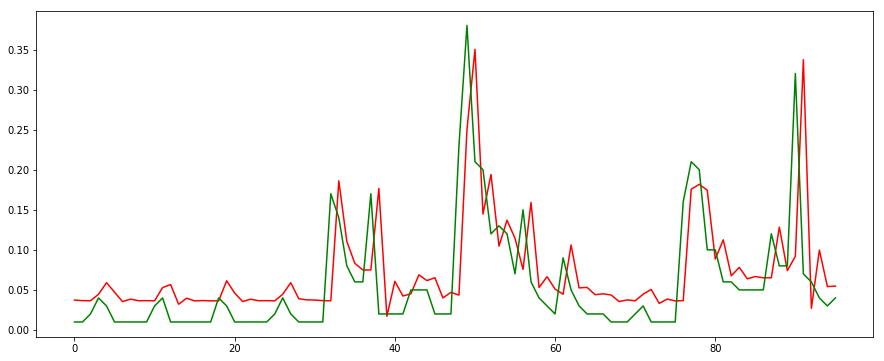

In [37]:
plt.plot(range(96),(test_data.loc[30424:30519].Pred),color='r')
plt.plot(range(96),(test_data.loc[30424:30519].USAGE),color='g')
plt.show()

## Loss Graph 

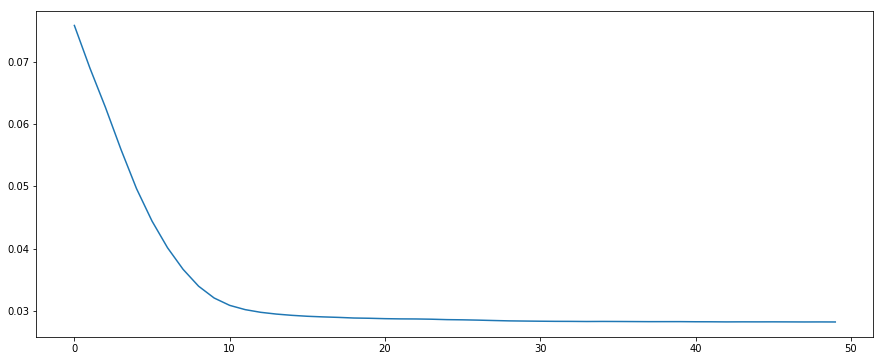

In [38]:
plt.plot(history.history['loss'])
plt.show()

## MSE

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
sqrt(mean_squared_error(test_data.USAGE,test_data.Pred))

0.07590214844393371